# Neural Network (MLP) Classifier test from sklearn

## About «Tic-Tac-Toe Endgame DataSet»

This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row"). 


Interestingly, this raw database gives a stripped-down decision tree algorithm (e.g., ID3) fits. However, the rule-based CN2 algorithm, the simple IB1 instance-based learning algorithm, and the CITRE feature-constructing decision tree algorithm perform well on it.


## Attributes
- 1 — top left
- 2 — top center
- 3 — top right
- 4 — midle left
- 5 — midle center
- 6 — midle right
- 7 — bottom left
- 8 — bottom center
- 9 — bottom right
- res — end-game-report

## Download DataSet

[= L = I = N = K =](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame)

## Import modules

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## And prepearing data

In [24]:
columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 'res']
data = pd.read_csv('tic-tac-toe.data', names=columns)

positive    626
negative    332
Name: res, dtype: int64

In [25]:
data.head()

,1,2,3,4,5,6,7,8,9,res
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [26]:
data.describe()

,1,2,3,4,5,6,7,8,9,res
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


### Counting a unique values in «res»

In [85]:
data['res'].value_counts()

1    626
0    332
Name: res, dtype: int64

### Remake values

#### COLUMNS №1 – №9
- x → 1
- o → -1
- nothing → 0

#### COLUMN «res»:
- 'positive' → 1
- 'negative' → 0

In [86]:
data[data == 'x'] = 1
data[data == 'o'] = -1
data[data == 'b'] = 0

data[data == 'positive'] = 1
data[data == 'negative'] = 0

data = data.astype('int')

In [28]:
data.head()

,1,2,3,4,5,6,7,8,9,res
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


### Separate data
#### Because 42

In [30]:
X = data.iloc[:, :-1]
Y = data['res']

X_train, X_test, y_train , y_test = train_test_split(X, Y, random_state=42)

(240, 9)

## Try simple-model with five neurons

In [89]:
MLPC = MLPClassifier(hidden_layer_sizes=(5,))
MLPC.fit(X_train, y_train)

print('TRAIN SCORE: {:.2f}'.format(MLPC.score(X_train, y_train)))
print('TEST SCORE: {:.2f}'.format(MLPC.score(X_test, y_test)))

TRAIN SCORE: 0.80
TEST SCORE: 0.82


C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Ok, result not bad

I want to test different random states and test_size's from train_test_split

And choose the best

C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


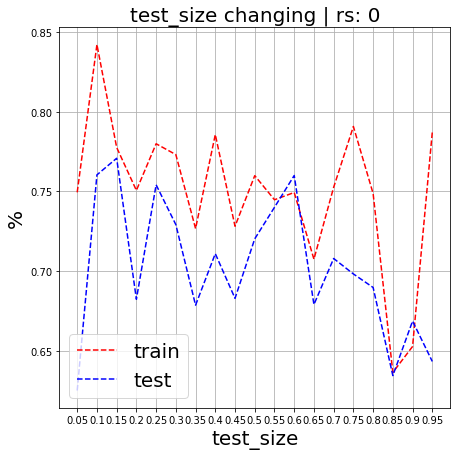

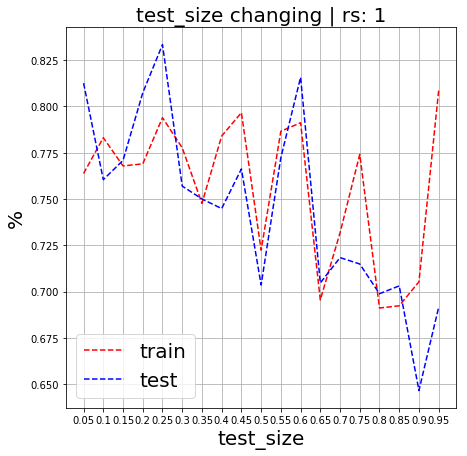

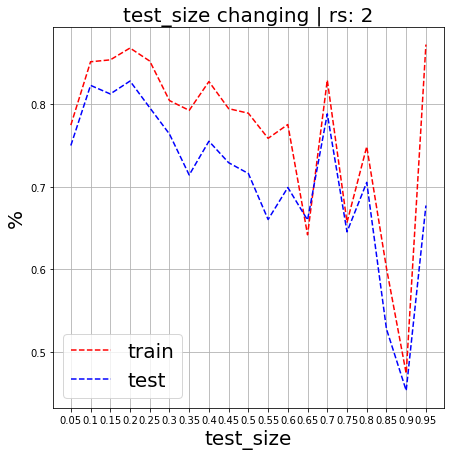

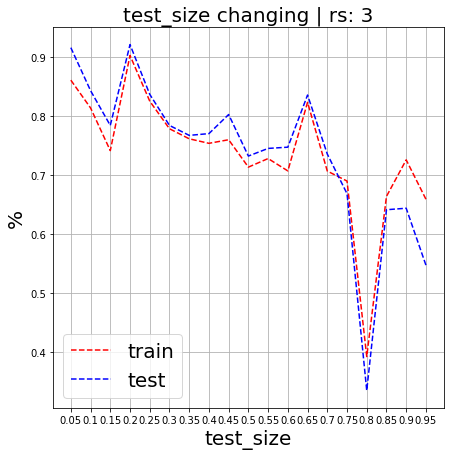

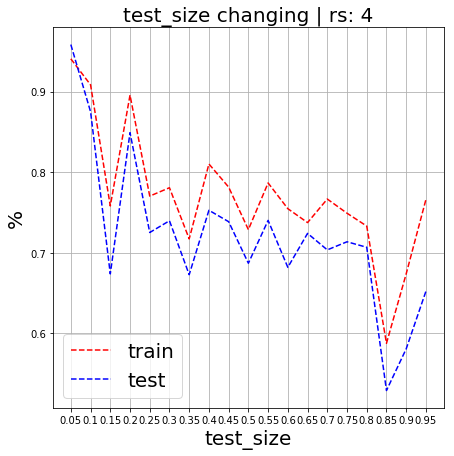

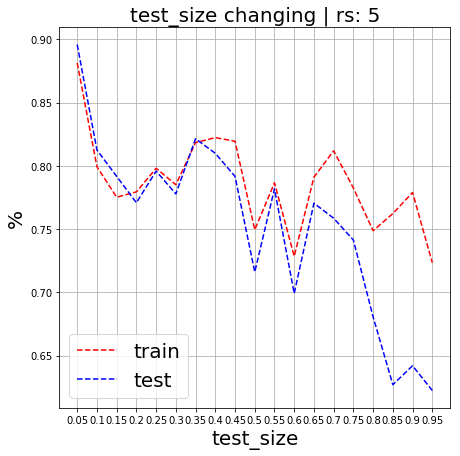

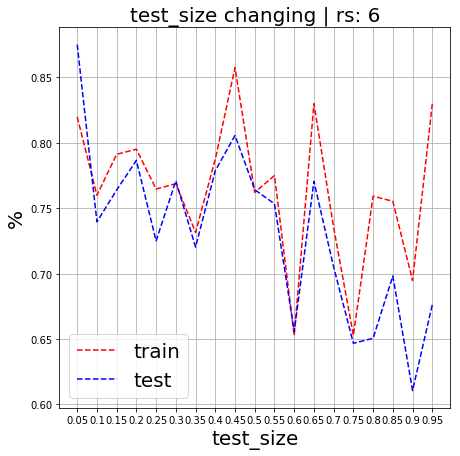

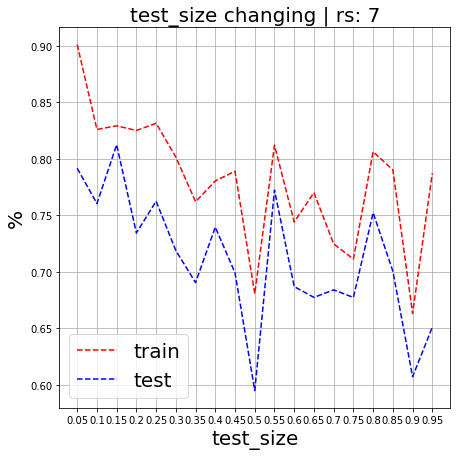

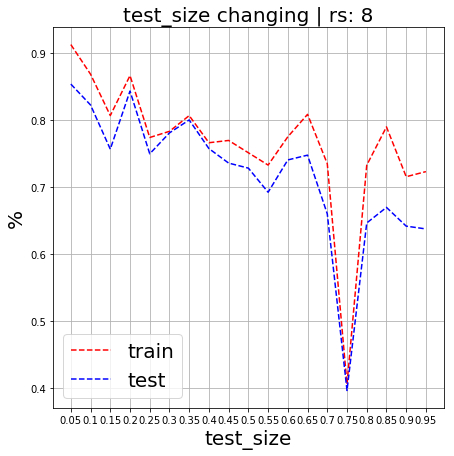

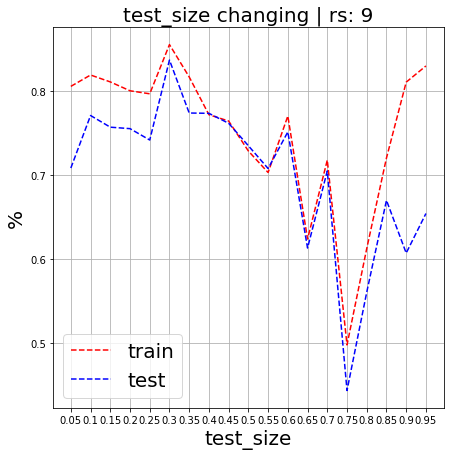

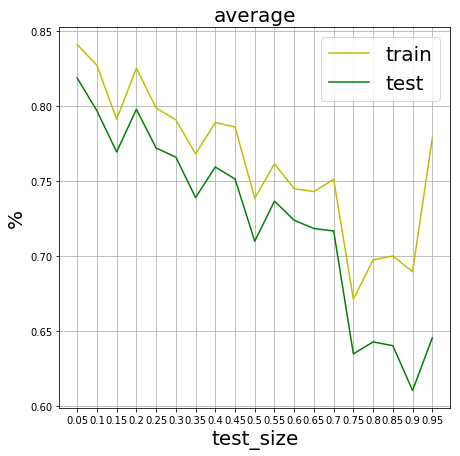

In [72]:
ts_list = np.arange(0.05, 1, 0.05).round(2)
rs_vol = 10

res_train_score_list = []
res_test_score_list = []

ave_train_list = []
ave_test_list = []

for rs in range(rs_vol):
    train_score_list = []
    test_score_list = []
    
    for ts in ts_list:
        X_train, X_test, y_train , y_test = train_test_split(X, Y, random_state=rs, test_size=ts)

        MLPC = MLPClassifier(hidden_layer_sizes=(5,))
        MLPC.fit(X_train, y_train)

        train_score = MLPC.score(X_train, y_train)
        test_score = MLPC.score(X_test, y_test)

        train_score_list.append(train_score)
        test_score_list.append(test_score)
        
    res_train_score_list.append(train_score_list)
    res_test_score_list.append(test_score_list)

    plt.figure(figsize=(7,7))
    plt.plot(train_score_list, 'r--', label='train')
    plt.plot(test_score_list, 'b--', label='test')
    plt.legend(loc='best', prop={'size': 20})
    plt.xticks(np.arange(len(ts_list)), tuple(ts_list))
    plt.title('test_size changing | rs: {}'.format(rs), fontsize=20)
    plt.xlabel('test_size', fontsize=20)
    plt.ylabel('%', fontsize=20)
    plt.grid()
    plt.show()
    
for i in range(len(res_train_score_list[0])):
    sum_train = 0
    sum_test = 0
    
    for j in range(len(res_train_score_list)):
        sum_train += res_train_score_list[j][i]
        sum_test += res_test_score_list[j][i]
        
    sum_train = sum_train / 10
    sum_test = sum_test / 10
        
    ave_train_list.append(sum_train)
    ave_test_list.append(sum_test)
    
plt.figure(figsize=(7,7))
plt.plot(ave_train_list, 'y-', label='train')
plt.plot(ave_test_list, 'g-', label='test')
plt.legend(loc='best', prop={'size': 20})
plt.xticks(np.arange(len(ts_list)), tuple(ts_list))
plt.title('average', fontsize=20)
plt.xlabel('test_size', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.grid()
plt.show()

### This NN has bad random scatter

But we can choose params for next work

In [99]:
rand_s = 1
test_s = 0.25

X_train, X_test, y_train , y_test = train_test_split(X, Y, random_state=rand_s, test_size=test_s)

In [100]:
MLPC = MLPClassifier(hidden_layer_sizes=(5,))
MLPC.fit(X_train, y_train)

print('TRAIN SCORE: {:.2f}'.format(MLPC.score(X_train, y_train)))
print('TEST SCORE: {:.2f}'.format(MLPC.score(X_test, y_test)))

TRAIN SCORE: 0.83
TEST SCORE: 0.83


C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## And now we can make loop to choose best hidden_layer_sizes

C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


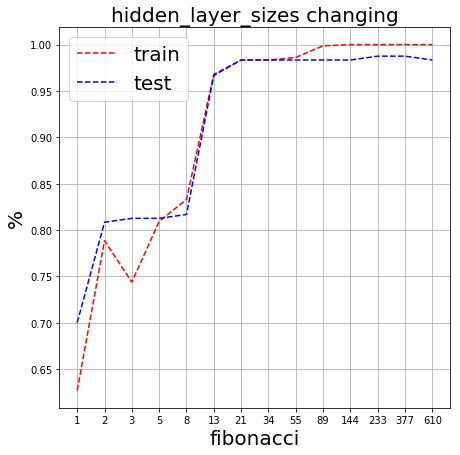

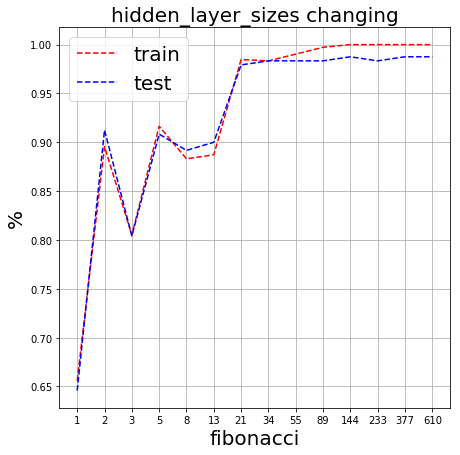

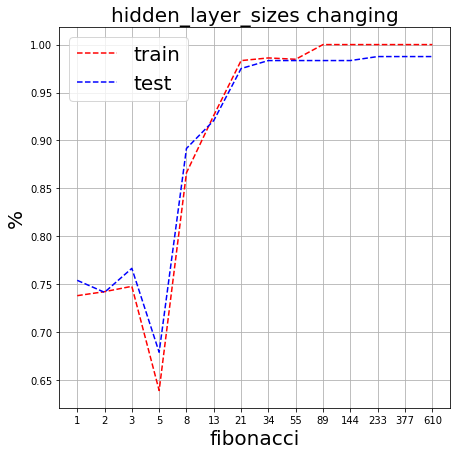

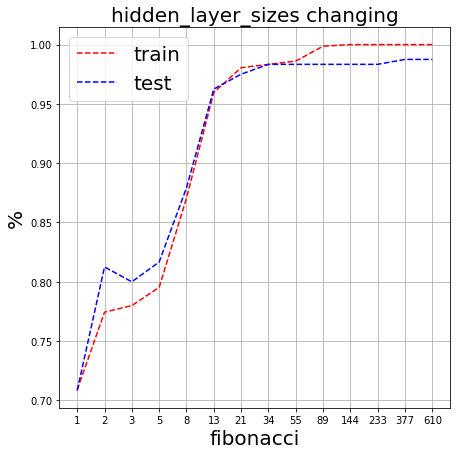

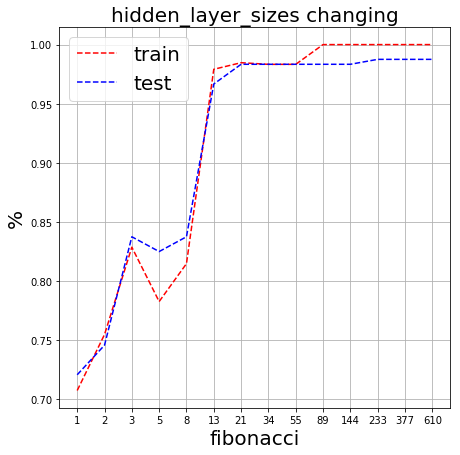

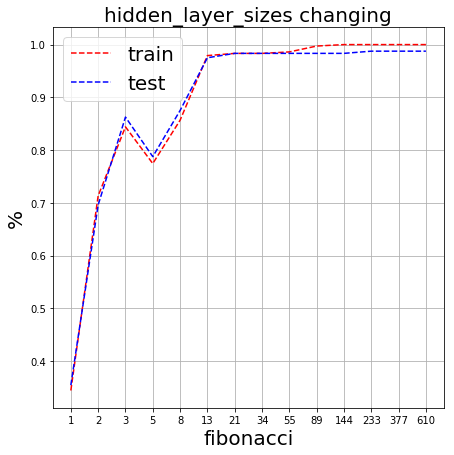

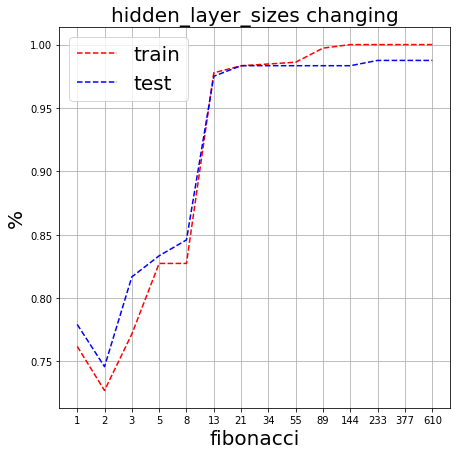

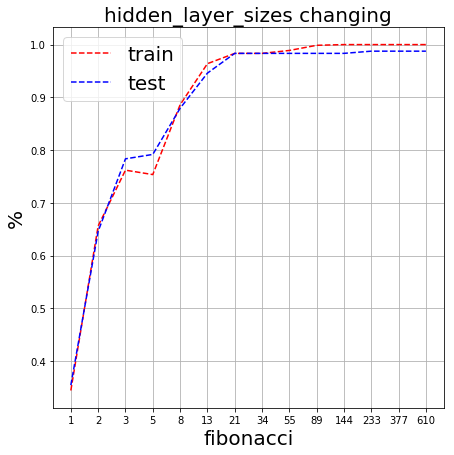

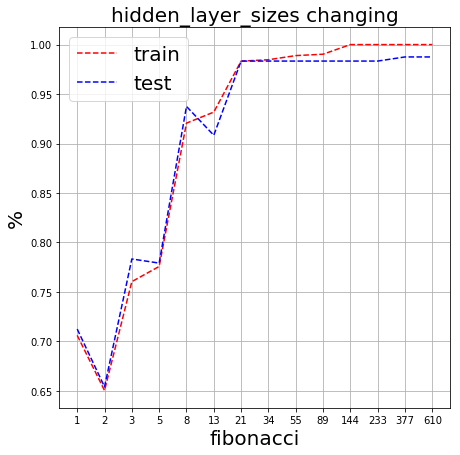

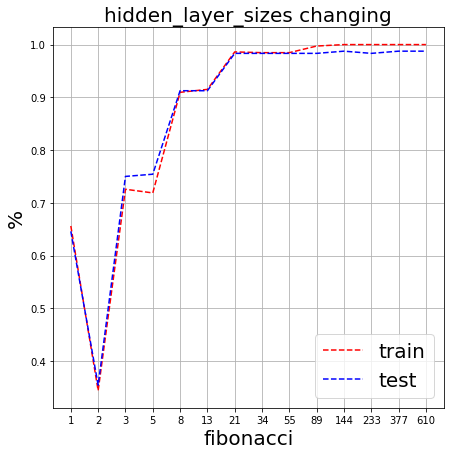

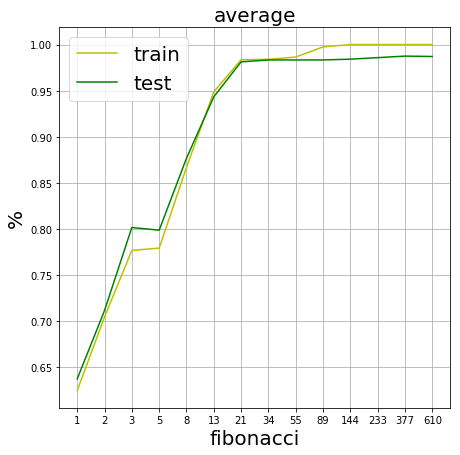

In [90]:
hl_list = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

hl_vol = 10

res_train_score_list = []
res_test_score_list = [] 

ave_train_score_list = []
ave_test_score_list = []

for i in range(hl_vol):
    train_score_list = []
    test_score_list = []
    
    for hl in hl_list:
        MLPC = MLPClassifier(hidden_layer_sizes=(hl, ))
        MLPC.fit(X_train, y_train)

        train_score = MLPC.score(X_train, y_train)
        test_score = MLPC.score(X_test, y_test)

        train_score_list.append(train_score)
        test_score_list.append(test_score)
        
    res_train_score_list.append(train_score_list)
    res_test_score_list.append(test_score_list)
    
    plt.figure(figsize=(7,7))
    plt.plot(train_score_list, 'r--', label='train')
    plt.plot(test_score_list, 'b--', label='test')
    plt.legend(loc='best', prop={'size': 20})
    plt.xticks(np.arange(len(hl_list)), tuple(hl_list))
    plt.title('hidden_layer_sizes changing', fontsize=20)
    plt.xlabel('fibonacci', fontsize=20)
    plt.ylabel('%', fontsize=20)
    plt.grid()
    plt.show()
        
for i in range(len(res_train_score_list[0])):
    sum_train = 0
    sum_test = 0
    
    for j in range(len(res_train_score_list)):
        sum_train += res_train_score_list[j][i]
        sum_test += res_test_score_list[j][i]
        
    sum_train = sum_train / hl_vol
    sum_test = sum_test / hl_vol
        
    ave_train_score_list.append(sum_train)
    ave_test_score_list.append(sum_test)
    
plt.figure(figsize=(7,7))
plt.plot(ave_train_score_list, 'y-', label='train')
plt.plot(ave_test_score_list, 'g-', label='test')
plt.legend(loc='best', prop={'size': 20})
plt.xticks(np.arange(len(hl_list)), tuple(hl_list))
plt.title('average', fontsize=20)
plt.xlabel('fibonacci', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.grid()
plt.show()

### I think — the best is 34

## Testing the loop with max_iterations

C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimi

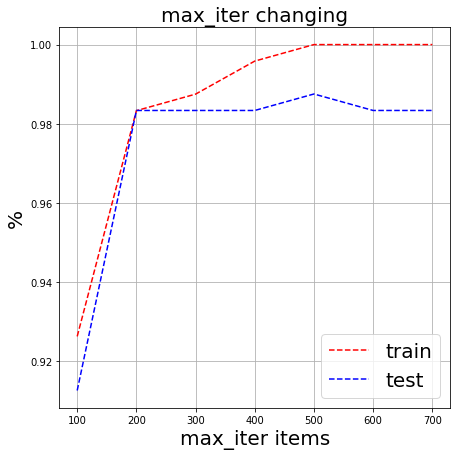

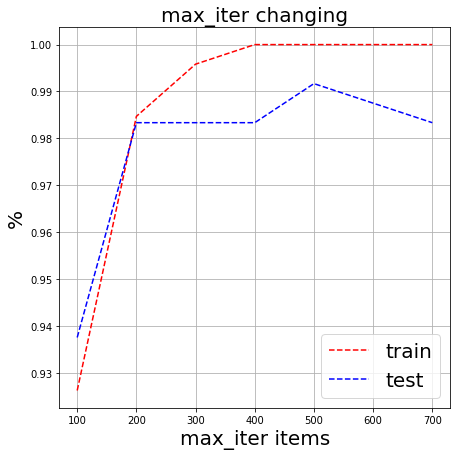

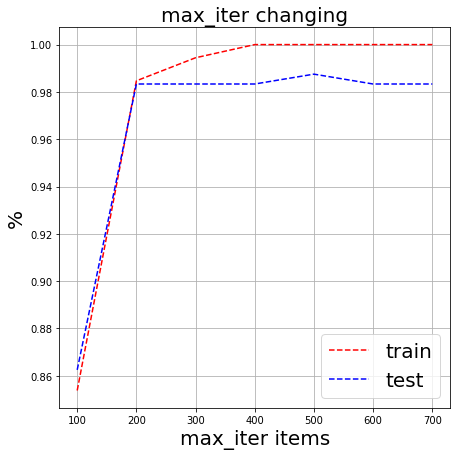

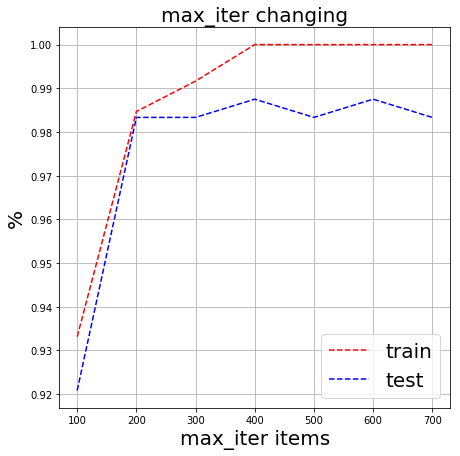

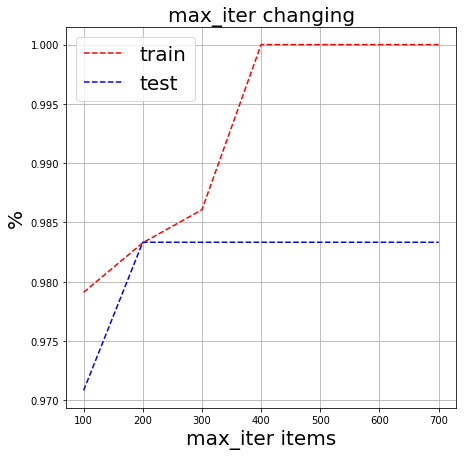

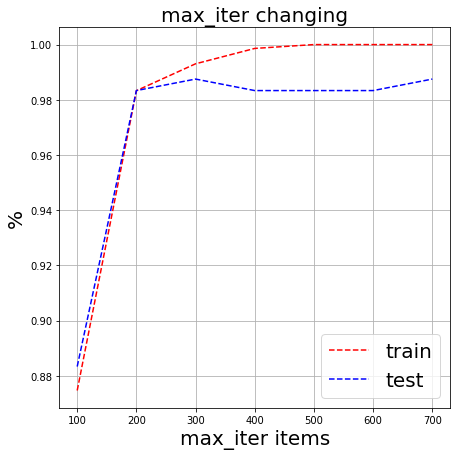

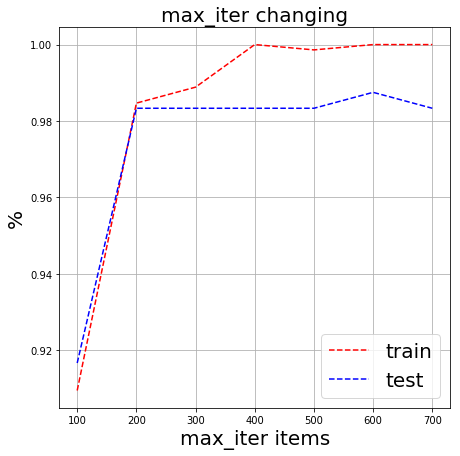

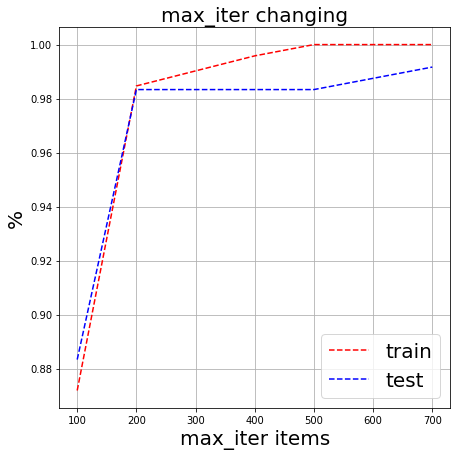

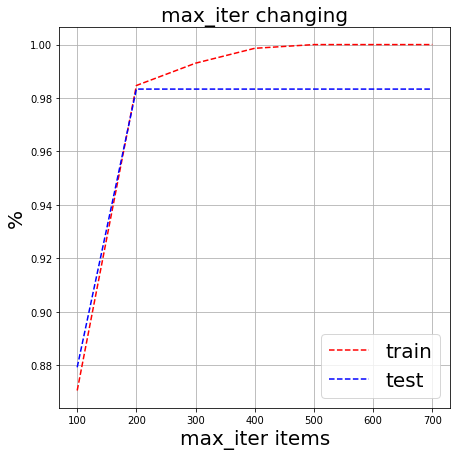

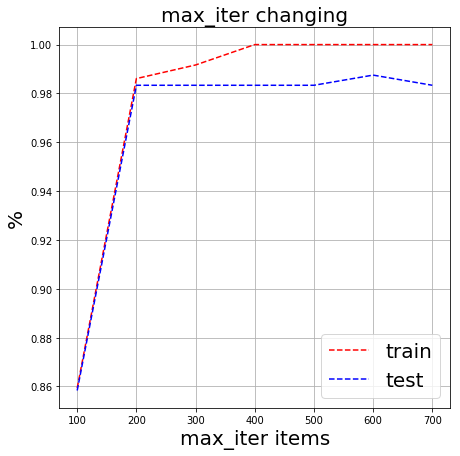

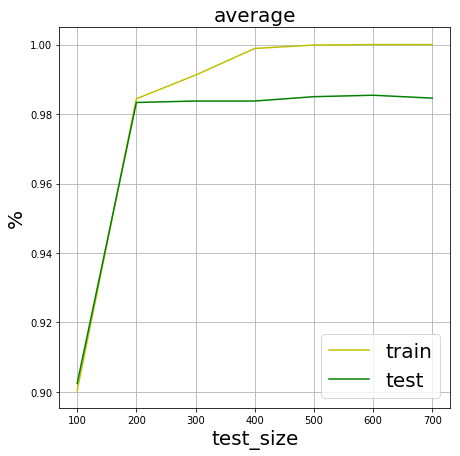

In [91]:
mi_list = np.arange(100, 800, 100).round(0)

mi_vol = 10

res_train_score_list = []
res_test_score_list = [] 

ave_train_score_list = []
ave_test_score_list = []

for i in range(mi_vol):
    train_score_list = []
    test_score_list = []
    
    for mi in mi_list:
        MLPC = MLPClassifier(max_iter=mi, hidden_layer_sizes=(34, ))
        MLPC.fit(X_train, y_train)

        train_score = MLPC.score(X_train, y_train)
        test_score = MLPC.score(X_test, y_test)

        train_score_list.append(train_score)
        test_score_list.append(test_score)
        
    plt.figure(figsize=(7,7))
    plt.plot(train_score_list, 'r--', label='train')
    plt.plot(test_score_list, 'b--', label='test')
    plt.legend(loc='best', prop={'size': 20})
    plt.xticks(np.arange(len(mi_list)), tuple(mi_list))
    plt.title('max_iter changing', fontsize=20)
    plt.xlabel('max_iter items', fontsize=20)
    plt.ylabel('%', fontsize=20)
    plt.grid()
    plt.show()
    
    res_train_score_list.append(train_score_list)
    res_test_score_list.append(test_score_list)
        
for i in range(len(res_train_score_list[0])):
    sum_train = 0
    sum_test = 0
    
    for j in range(len(res_train_score_list)):
        sum_train += res_train_score_list[j][i]
        sum_test += res_test_score_list[j][i]
        
    sum_train = sum_train / mi_vol
    sum_test = sum_test / mi_vol
        
    ave_train_score_list.append(sum_train)
    ave_test_score_list.append(sum_test)
    
plt.figure(figsize=(7,7))
plt.plot(ave_train_score_list, 'y-', label='train')
plt.plot(ave_test_score_list, 'g-', label='test')
plt.legend(loc='best', prop={'size': 20})
plt.xticks(np.arange(len(mi_list)), tuple(mi_list))
plt.title('average', fontsize=20)
plt.xlabel('test_size', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.grid()
plt.show()

### I've chose max_iter is 300

## The last test is — Testing BEST model with my params

In [101]:
BEST_MLPC = MLPClassifier(max_iter=300, hidden_layer_sizes=(34,))
BEST_MLPC.fit(X_train, y_train)

print('TRAIN SCORE: {:.2f}'.format(BEST_MLPC.score(X_train, y_train)))
print('TEST SCORE: {:.2f}'.format(BEST_MLPC.score(X_test, y_test)))

TRAIN SCORE: 0.99
TEST SCORE: 0.98


C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# REPORT

1. Prediction power of model has growed

2. NN-model has random scatter, and model can do different thing with equal params
3. Item 2. can be minimize with proper treatment

![giphy](source.gif)